## Calculez le RMS de ce signal et retournez le en dB SPL.

In [37]:
import numpy as np      # Importer le module numpy
np.random.seed(0) 
x = np.random.random(1000)
print(x[:3]) 
meh = np.sqrt((x**2).mean())
## RMS du tableau
db = 20.0*np.log10(meh*20e-6)
print(db)

[0.5488135  0.71518937 0.60276338]
-98.7891856336499


In [74]:
np.random.seed(0)
y = np.random.random((100, 320, 240, 3))
# [:,::2] => colonnes
# interpretation des slices Commence à 0, jusqu'à la fin avec un step à 2
y[::2,::2] = 0 # Des images paires on veut les lignes paires
#y[::2,::2,:,:] = 0 # Des images paires on veut les lignes paires
y[1::2, 1::2, :,:] = 0
print(y[:3,:4,:4,0])



[[[0.         0.         0.         0.        ]
  [0.75102165 0.89569129 0.69078478 0.36454463]
  [0.         0.         0.         0.        ]
  [0.31840293 0.78903597 0.41464415 0.66176359]]

 [[0.26917506 0.1927614  0.66794884 0.06779536]
  [0.         0.         0.         0.        ]
  [0.06870976 0.12801903 0.13530805 0.72197953]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.52556181 0.46489916 0.73705514 0.41742476]
  [0.         0.         0.         0.        ]
  [0.53673772 0.77686241 0.56715143 0.49911269]]]


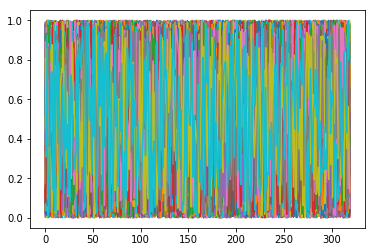

In [75]:
y = np.random.random((100, 320, 240))
import matplotlib.pyplot as plt
plt.plot(y[0])
plt.show()


151
(695,)


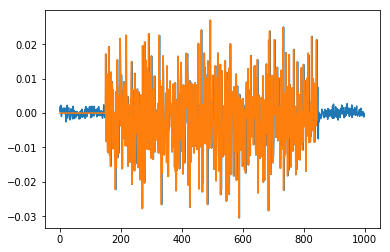

In [111]:
np.random.seed(0)
z = np.random.randn(1000)*0.001
z[150:-150] *= 10
import matplotlib.pyplot as plt
plt.plot(z)
#plt.show()
filtered = np.where(z>0.005)

print(new[0][0])
filterd = z[new[0][0]:new[0][-1]]

meh = np.concatenate((np.zeros(150),filterd))
plt.plot(meh)

print(filterd.shape)
#plt.show()
